In [ ]:
#Set 1
import numpy as np
import pandas as pd

df=pd.DataFrame({
    'Name':['Balu', 'Ram', 'Shyam', 'Rashi', 'Bhanu'],
    'Marks':[91, 76, 82, 68, 52],
    'Department':['CSE', 'ECE', 'CIC', 'CSE','CSE'],
    'Year':[2023, 2024, 2022, 2023, 2025]
}
)
df.set_index(['Department','Year'], inplace=True)
print(df)
df.loc['CSE', 2023]


                  Name  Marks
Department Year              
CSE        2023   Balu     91
ECE        2024    Ram     76
CIC        2022  Shyam     82
CSE        2023  Rashi     68
           2025  Bhanu     52


C:\Users\utanv\AppData\Local\Temp\ipykernel_27736\4125690777.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['CSE', 2023]


Name  Marks
Department Year              
CSE        2023   Balu     91
           2023  Rashi     68

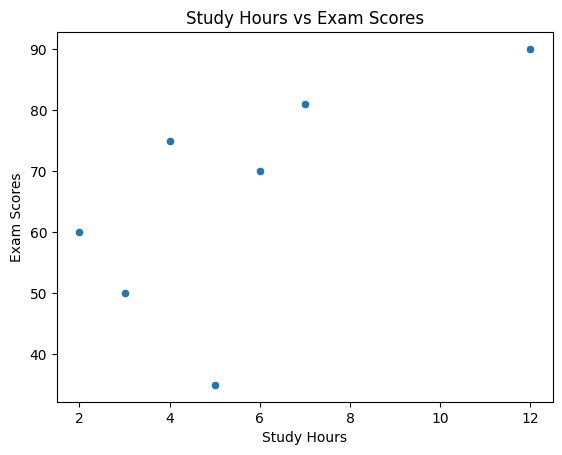

In [ ]:

#Set 1 Q2.
import matplotlib.pyplot as plt
import seaborn as sns
study=pd.DataFrame({
    'study_hours':[3, 4, 2, 5, 7, 6, 12],
    'Exam_Scores':[50, 75, 60, 35, 81,70, 90 ]
})
sns.scatterplot(x='study_hours', y='Exam_Scores', data=study)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.show()

In [29]:
#Set 2

df1=pd.DataFrame({
    'Name':['Tanu', 'Manu', 'Kokila', 'Ramu', 'Suresh'],
    'Roll No':[101, 102, 103, 104, 105],
    'Department':['CSE', 'ECE', 'CIC', 'IT', 'AIDS']
})
df2=pd.DataFrame({
    'Roll No':[101, 102, 103, 104, 105],
    'Semester':['III','III', 'I','VII', 'V']
})
merged=pd.merge(df1, df2, how='outer')
merged


,Name,Roll No,Department,Semester
0,Tanu,101,CSE,III
1,Manu,102,ECE,III
2,Kokila,103,CIC,I
3,Ramu,104,IT,VII
4,Suresh,105,AIDS,V


In [32]:
df_s=merged.stack()
df_s

0  Name            Tanu
   Roll No          101
   Department       CSE
   Semester         III
1  Name            Manu
   Roll No          102
   Department       ECE
   Semester         III
2  Name          Kokila
   Roll No          103
   Department       CIC
   Semester           I
3  Name            Ramu
   Roll No          104
   Department        IT
   Semester         VII
4  Name          Suresh
   Roll No          105
   Department      AIDS
   Semester           V
dtype: object

<Axes: >

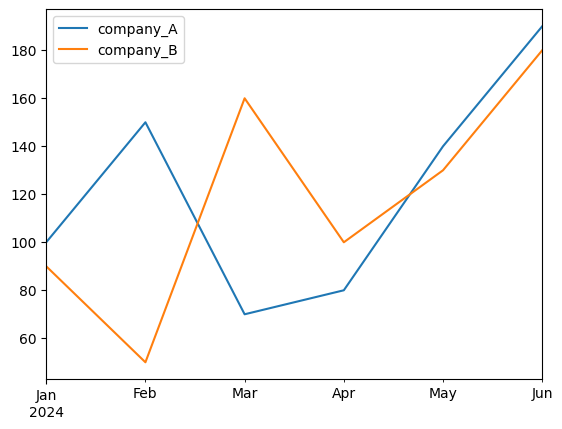

In [ ]:
#Set 2 Q2.
import pandas as pd
sales=pd.DataFrame({
    'company_A':[100, 150, 70, 80, 140, 190],
    'company_B':[90, 50, 160, 100, 130, 180]
},index=pd.date_range("2024-01-01", periods=6, freq='ME')) #Use Time Series as index of the DataFrame
sales.plot()

In [ ]:
#Set 3 Q1. Concatenate 3 different Dataframes of monthly sales (jan, feb, mar) into one quarter 
# using hierarchical indexing. Find Mean Sales of Each Month

